# Creating Customer Segments

### Preparation

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Set figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
#data.var() # variance in the data

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


### PCA

The principal components are:
         Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
PC-1 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
PC-2 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
PC-3 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
PC-4 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
PC-5  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
PC-6 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417


The explained variance ratios are: 
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]




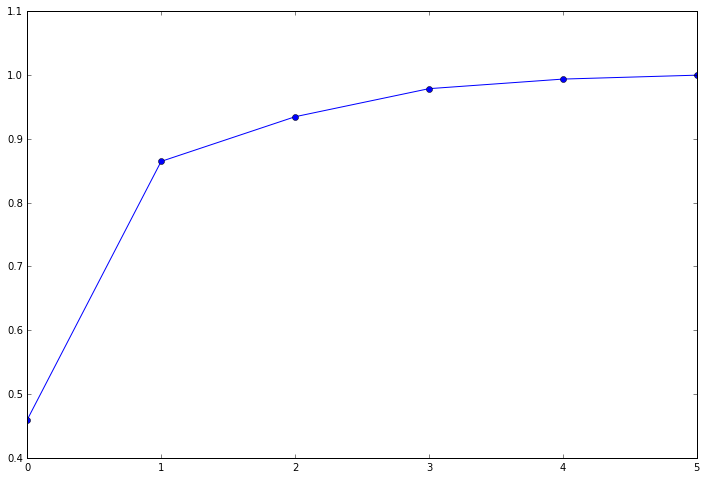

In [2]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "The principal components are:"
print pd.DataFrame(pca.components_,
                   columns=data.columns,
                   index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6'])
print "\n"
print "The explained variance ratios are: \n{}".format(pca.explained_variance_ratio_)
# Plot the ratios
x = np.arange(6)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')
print "\n"

The first 10 rows of the PCA transformed data: 
[[ -6.50022122e+02   1.58551909e+03  -9.53906437e+01  -4.54078048e+03
    3.56637118e+02   2.26711848e+02]
 [  4.42680498e+03   4.04245151e+03   1.53480474e+03  -2.56765566e+03
    4.43942826e+01   4.68938017e+02]
 [  4.84199871e+03   2.57876218e+03   3.80138479e+03  -2.27349434e+03
   -5.24538544e+03  -2.14112333e+03]
 [ -9.90346437e+02  -6.27980600e+03   1.39695981e+03   3.31000607e+03
   -3.18152336e+02   2.47816335e+02]
 [ -1.06579987e+04  -2.15972582e+03  -2.00429822e+01  -1.72715386e+02
   -3.18871712e+03  -5.10145095e+02]
 [  2.76596159e+03  -9.59870727e+02   9.79704874e+02  -4.25820294e+03
    2.24100167e+02  -3.95276252e+01]
 [  7.15550892e+02  -2.01300227e+03  -3.25903438e+03  -3.11462140e+02
    1.23016000e+01  -4.20873765e+02]
 [  4.47458367e+03   1.42949697e+03  -8.42633869e+02   4.19073048e+02
   -1.65015129e+03   6.94735096e+00]
 [  6.71209540e+03  -2.20590916e+03  -1.40385218e+03  -8.89700036e+02
   -3.65662530e+02   5.565

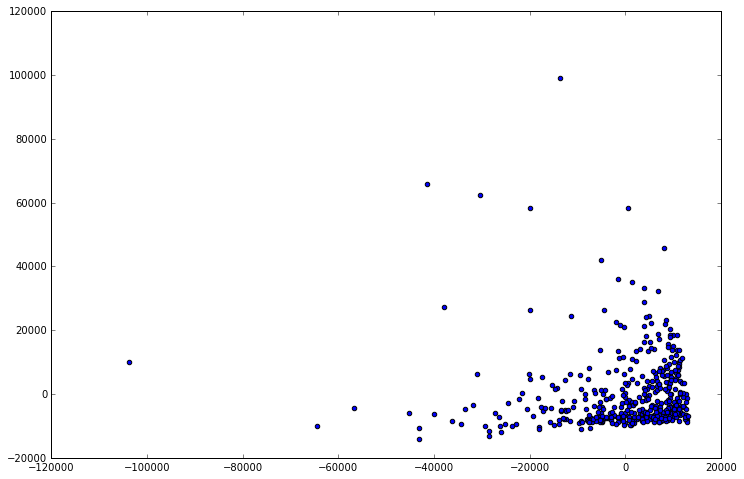

In [3]:
# Visualize the principal components
pca = PCA(n_components = 6)
data_pca = pca.fit_transform(data)
print "The first 10 rows of the PCA transformed data: \n{}".format(data_pca[:10,:])
print "\n"
print "Here is the plot:"
plt.scatter(data_pca[:, 0], data_pca[:, 1])

### ICA

The independent components are:
         Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
IC-1  0.003792 -0.016976 -0.114580  0.007090          0.134342      0.016148
IC-2 -0.001940 -0.072583  0.055137  0.001766         -0.015770      0.017065
IC-3  0.010930  0.001035 -0.007349 -0.054049          0.002645      0.016767
IC-4 -0.002663  0.013924 -0.060813 -0.002006          0.003626      0.004070
IC-5  0.050227 -0.006331 -0.005911 -0.003286          0.009799     -0.002942
IC-6  0.004882  0.001618  0.005705  0.002532         -0.002430     -0.050965


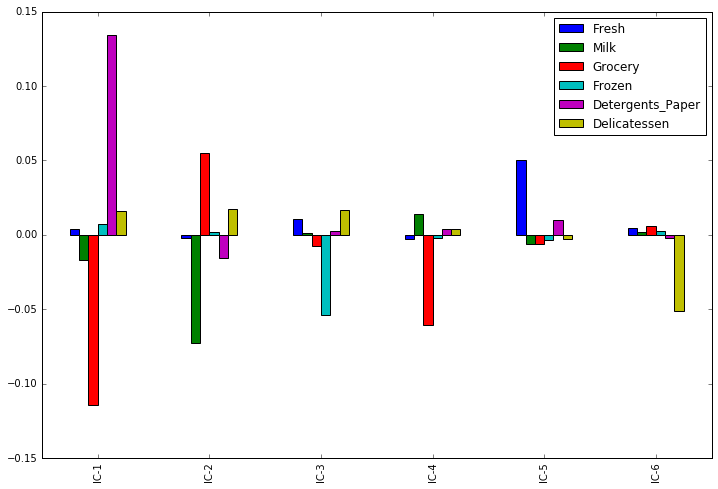

In [4]:
# Center the data
from sklearn.preprocessing import scale
data_scaled = scale(data)

# Fit an ICA model to the data
from sklearn.decomposition import FastICA
ica = FastICA(random_state=66)
ica.fit(data_scaled)

# Print the independent components
print "The independent components are:"
# Make a dataframe for output and visualization
ica_components = pd.DataFrame(ica.components_,
                              columns=data.columns,
                              index=['IC-1', 'IC-2', 'IC-3', 'IC-4', 'IC-5', 'IC-6'])
print ica_components
ica_components.plot(kind = 'bar')

### Clustering

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# Implement clustering algorithm, and fit it to the reduced data for visualization

# Perform model selection using Bayesian information criterion
# Parameters to tune: number of components and covariance types
lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, 
                  covariance_type=cv_type, 
                  random_state=66)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            clusters = gmm

print "The best model is:\n", clusters

The best model is:
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=8, n_init=1, n_iter=100, params='wmc', random_state=66,
  thresh=None, tol=0.001, verbose=0)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# Find the centroids for KMeans or the cluster means for GMM 
#centroids = clusters.cluster_centers_
centroids = clusters.means_
print centroids

[[    509.8119812    -7655.93555606]
 [   9409.05698006    5444.18729167]
 [ -19710.9394465    45610.15223872]
 [ -26065.24600297   -8381.4913312 ]
 [   2776.94679273   15018.18800395]
 [   7549.90079159   -5249.1086203 ]
 [  -5476.32462616    -990.10553452]
 [-103863.42532004    9910.34962857]]


In [10]:
# Now put the centroids back in the origional space for easier interpretation
segments = pd.DataFrame(pca.inverse_transform(centroids),
                        columns=data.columns,
                        index=['Segment A', 'Segment B', 'Segment C', 'Segment D', 
                              'Segment E', 'Segment F', 'Segment G', 'Segment H'])
print "The typical purchasing behaviors of each segment are as below:\n", segments

The typical purchasing behaviors of each segment are as below:
                   Fresh          Milk       Grocery        Frozen  \
Segment A   12349.300099   1785.536731   2066.126034   3137.600071   
Segment B    2209.804352   7464.161639  11534.900572   1536.390440   
Segment C   26203.641529  31710.732773  44038.109854   5221.201989   
Segment D   38381.079918   4631.767206   3146.800970   7200.283575   
Segment E    7627.287175  13206.157984  19263.385314   2367.631016   
Segment F    5208.165571   2173.836639   3473.151444   2019.875505   
Segment G   17457.649895   5949.210649   7531.251429   3924.868131   
Segment H  112330.537474  23494.638332  21920.589895  18711.487095   

           Detergents_Paper  Delicatessen  
Segment A         87.987591   1053.155079  
Segment B       4936.904280   1194.819282  
Segment C      19406.152693   5470.669879  
Segment D       -364.559834   2821.627551  
Segment E       8387.988685   2192.973653  
Segment F       1016.985655    711.071659 

In [11]:
# Make a new data frame that is of the same dimension to put the percentiles
from scipy.stats import percentileofscore
segments_percentiles = segments.copy()

# Calculate the percentiles
for row in segments_percentiles.index:
    for col in segments_percentiles.columns:
        val = segments_percentiles.loc[row][col]
        percentile = percentileofscore(data[col], val)
        segments_percentiles.loc[row][col] = percentile
print segments_percentiles

                Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
Segment A   65.227273  27.954545  23.181818  71.363636          8.181818   
Segment B   17.727273  76.590909  78.409091  50.227273         80.909091   
Segment C   89.090909  98.636364  98.863636  83.181818         98.409091   
Segment D   95.454545  58.636364  38.409091  89.090909          0.000000   
Segment E   46.590909  91.590909  90.227273  62.727273         91.590909   
Segment F   34.772727  35.000000  42.045455  57.500000         55.227273   
Segment G   76.590909  66.590909  64.772727  77.500000         66.590909   
Segment H  100.000000  97.045455  93.181818  99.318182         83.409091   

           Delicatessen  
Segment A     53.636364  
Segment B     59.318182  
Segment C     97.045455  
Segment D     88.636364  
Segment E     81.818182  
Segment F     40.000000  
Segment G     75.909091  
Segment H     99.090909  


In [12]:
# Now convert percentiles into description lables
segments_descriptions = segments_percentiles.copy()

for col in segments_descriptions.columns:
        segments_descriptions[col] = pd.cut(segments_percentiles[col], 
                                            [-1, 10, 40, 60, 90, 100], 
                                            labels=['very low', 'low', 'medium', 'high', 'very high'],
                                            right=True)
print "\n", segments_descriptions


               Fresh       Milk    Grocery     Frozen Detergents_Paper  \
Segment A       high        low        low       high         very low   
Segment B        low       high       high     medium             high   
Segment C       high  very high  very high       high        very high   
Segment D  very high     medium        low       high         very low   
Segment E     medium  very high  very high       high        very high   
Segment F        low        low     medium     medium           medium   
Segment G       high       high       high       high             high   
Segment H  very high  very high  very high  very high             high   

          Delicatessen  
Segment A       medium  
Segment B       medium  
Segment C    very high  
Segment D         high  
Segment E         high  
Segment F          low  
Segment G         high  
Segment H    very high  


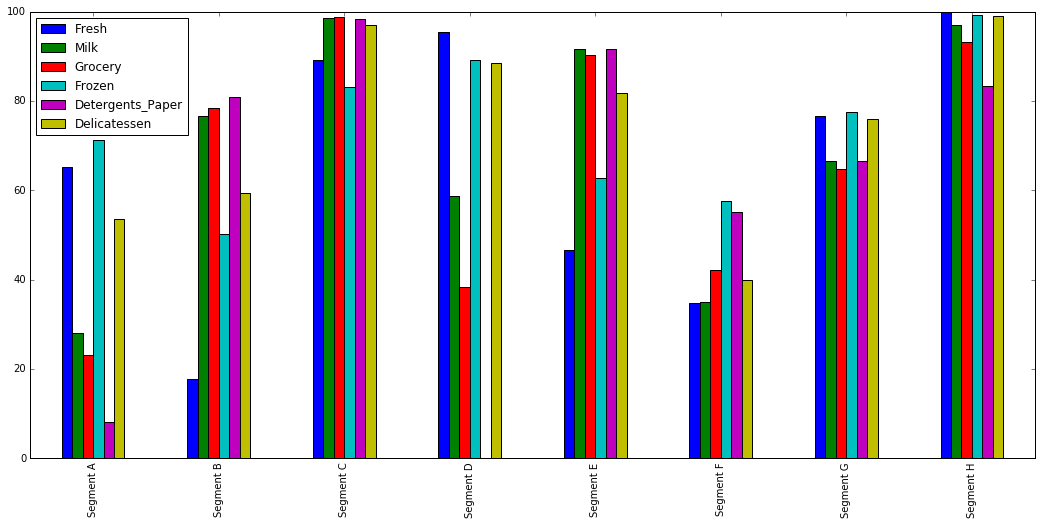

In [13]:
# Visualize the above finding
rcParams['figure.figsize'] = 18, 8
segments_percentiles.plot(kind='bar')

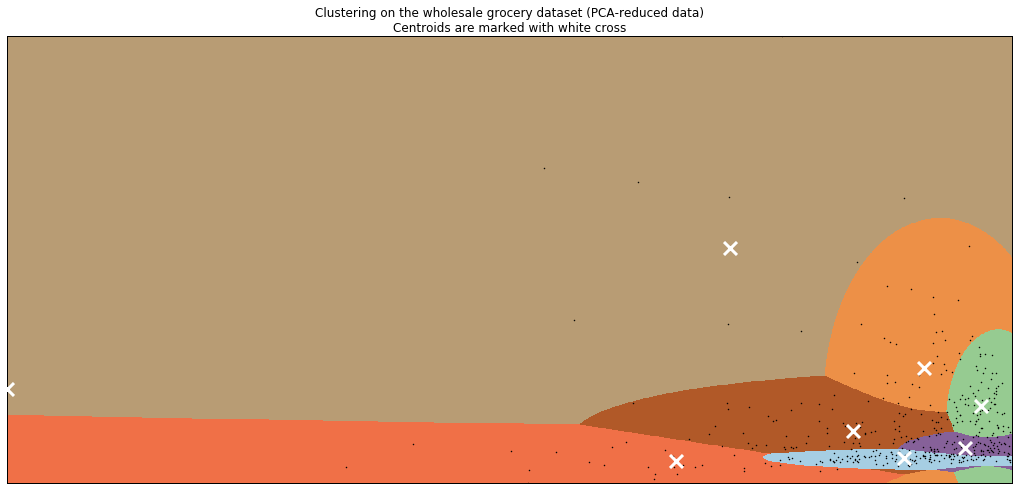

In [14]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()